In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv(r'C:\Users\prave\Downloads\file_3_Mar18_Output_1.csv')
df2 = pd.read_csv(r'C:\Users\prave\Downloads\file_4_Mar18_Output_1 (1).csv')
df3 = pd.concat([df1, df2])

In [60]:
#print(df3)
columns_to_drop = ['timestamp_call_key', 'retailer_code', 'serial', 'account_open_date_13_march', 'account_open_date_18_march']
df3.drop(columns=columns_to_drop, inplace=True)
print(len(df3))
print(df3)

1798798
       reason                            mos  resolved  \
0          PP                       IA PP TR  resolved   
1          BA                 IA BA TS nl TR     floor   
2          PT           IA AA BA MR nl PT TR  resolved   
3          BA                          IA BA  resolved   
4          BA              IA BA TS nl mm TR     floor   
...       ...                            ...       ...   
894160     BA                    IA BA TA nl  resolved   
894161     BA                          IA BA  resolved   
894162     PP                       IA PP TR  resolved   
894163     FD                       IA IA TR     floor   
894164     LS  IA AA BA TS nl LS nl nl LS TR     floor   

        no_of_accounts_with_syf_13_march  account_balance_13_march  \
0                                    1.0                       NaN   
1                                    2.0                    143.28   
2                                   12.0                      0.00   
3              

C:\Users\prave\AppData\Local\Temp\ipykernel_39344\3939875645.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col + '_LabelEncoded'] = label_encoder.fit_transform(df_cleaned[col])
C:\Users\prave\AppData\Local\Temp\ipykernel_39344\3939875645.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col + '_LabelEncoded'] = label_encoder.fit_transform(df_cleaned[col])
C:\Users\prave\AppData\Local\Temp\ipykernel_39344\3939875645.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

        no_of_accounts_with_syf_13_march  account_balance_13_march  \
55                                   2.0                     15.35   
215                                  4.0                      0.28   
235                                  2.0                    756.05   
296                                  5.0                   1146.50   
439                                  1.0                      0.00   
...                                  ...                       ...   
893936                               3.0                      0.00   
894024                               1.0                   1992.93   
894027                               4.0                    485.83   
894047                               4.0                   2935.10   
894163                               8.0                    386.63   

       card_activation_status_13_march  eservice_ind_13_march  \
55                                   0                      0   
215                          

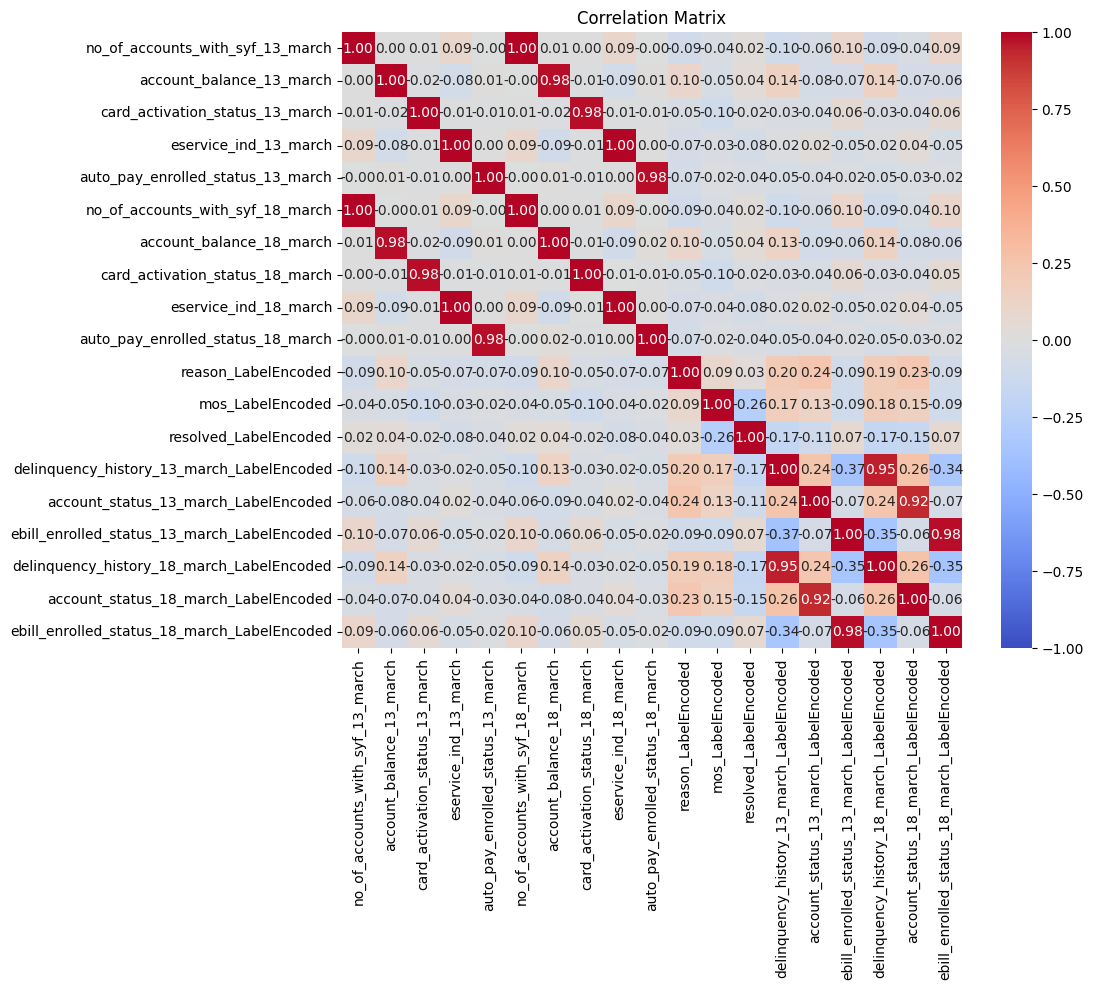

In [61]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding
df3.replace(' ', pd.NA, inplace=True)
df_cleaned = df3.dropna()
label_encoder = LabelEncoder()
column_to_encode = ['reason', 'mos', 'resolved', 'delinquency_history_13_march', 'account_status_13_march', 'ebill_enrolled_status_13_march', 'delinquency_history_18_march', 'account_status_18_march', 'ebill_enrolled_status_18_march']
for col in column_to_encode:
    df_cleaned[col + '_LabelEncoded'] = label_encoder.fit_transform(df_cleaned[col])

df_cleaned.drop(columns=column_to_encode, inplace=True)
print(df_cleaned)



# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
